In [1]:
%matplotlib inline

import os
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from IPython.display import display
from IPython.display import Audio as IPyAudio

from b2aiprep import process as b2p

torchvision is not available - cannot save figures


In [2]:
filename1 = "../data/test_audio.wav"
audio1 = b2p.Audio.from_file(filename1)

In [3]:
display(IPyAudio(data=audio1.signal.squeeze(), rate=audio1.sample_rate))

#### Plot a spectrogram of the signal after resampling to 16KHz

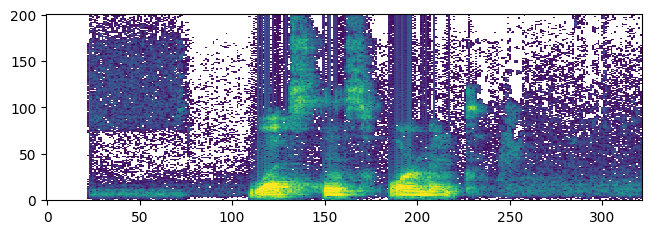

In [4]:
audio1_16 = b2p.resample_iir(audio1, lowcut=7000, new_sample_rate=16000, order=4)
specgram = b2p.specgram(audio1_16)
ax = plt.matshow(specgram.T, origin='lower', aspect=0.5, norm=LogNorm(vmin=0, vmax=1))
ax.axes.xaxis.set_ticks_position('bottom')

#### Compute relevant features of the audio and write it out

In [5]:
features, outfile = b2p.to_features(filename1, subject="s1", task="t1")
outfile

PosixPath('/Users/satra/software/sensein/b2aiprep/docs/sub-s1_task-t1_md5-a270513a8d6d09948a2b225ca84c0d48_features.pt')

#### Plot the spectrogram from the features

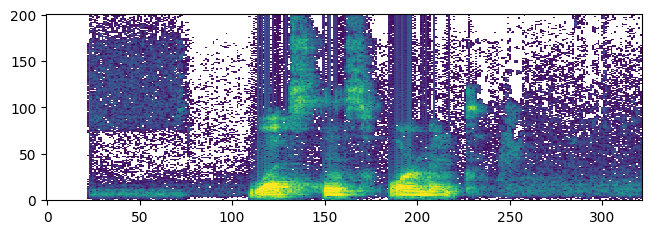

In [6]:
ax = plt.matshow(features['specgram'].T, origin='lower', aspect=0.5, norm=LogNorm(vmin=0, vmax=1))
ax.axes.xaxis.set_ticks_position('bottom')

#### Plot the Mel filterbank

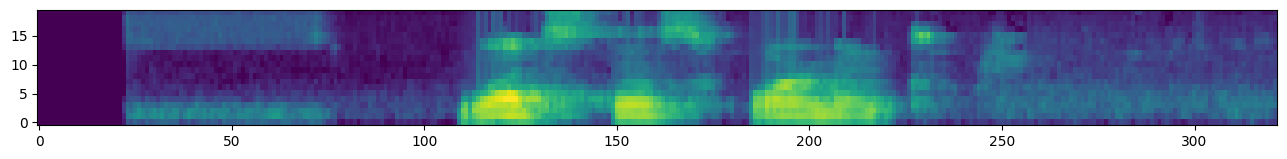

In [7]:
ax = plt.matshow(features['melfilterbank'].T, origin='lower', aspect=1.5)
ax.axes.xaxis.set_ticks_position('bottom')

#### Plot the MFCC + delta coefficients

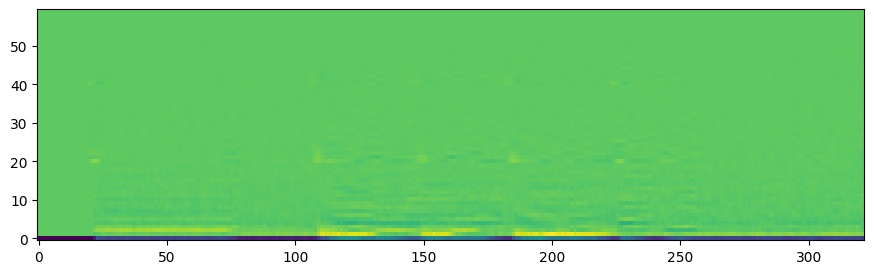

In [8]:
ax = plt.matshow(features['mfcc'].T, origin='lower', aspect=1.5)
ax.axes.xaxis.set_ticks_position('bottom')

#### Verify if two recordings are from the same speaker

In [9]:
audio2 = b2p.Audio.from_file("../data/test_audio2.wav")
display(IPyAudio(data=audio2.signal.squeeze(), rate=audio2.sample_rate))

In [12]:
score, prediction = b2p.verify_speaker(audio1, audio2, model='speechbrain/spkrec-ecapa-voxceleb')
print(f"Score: {float(score):.2f}, Prediction: {bool(prediction)}")

Score: 0.77, Prediction: True
